In [3]:
def predict(img_path, classes, model):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(classes.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((256, 256))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

In [ ]:
import pandas as pd
import os

def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    data = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return data
train = train_df('cleaned/Training')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(rescale=1/255)
training = generator.flow_from_dataframe(train, x_col='Class Path',
                                  y_col='Class', batch_size=32,
                                  target_size=(256, 256))
classes = training.class_indices

Found 5712 validated image filenames belonging to 4 classes.


In [5]:
import tensorflow as tf
model = tf.keras.models.load_model('../Models/mri-brain-tumor-detector.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


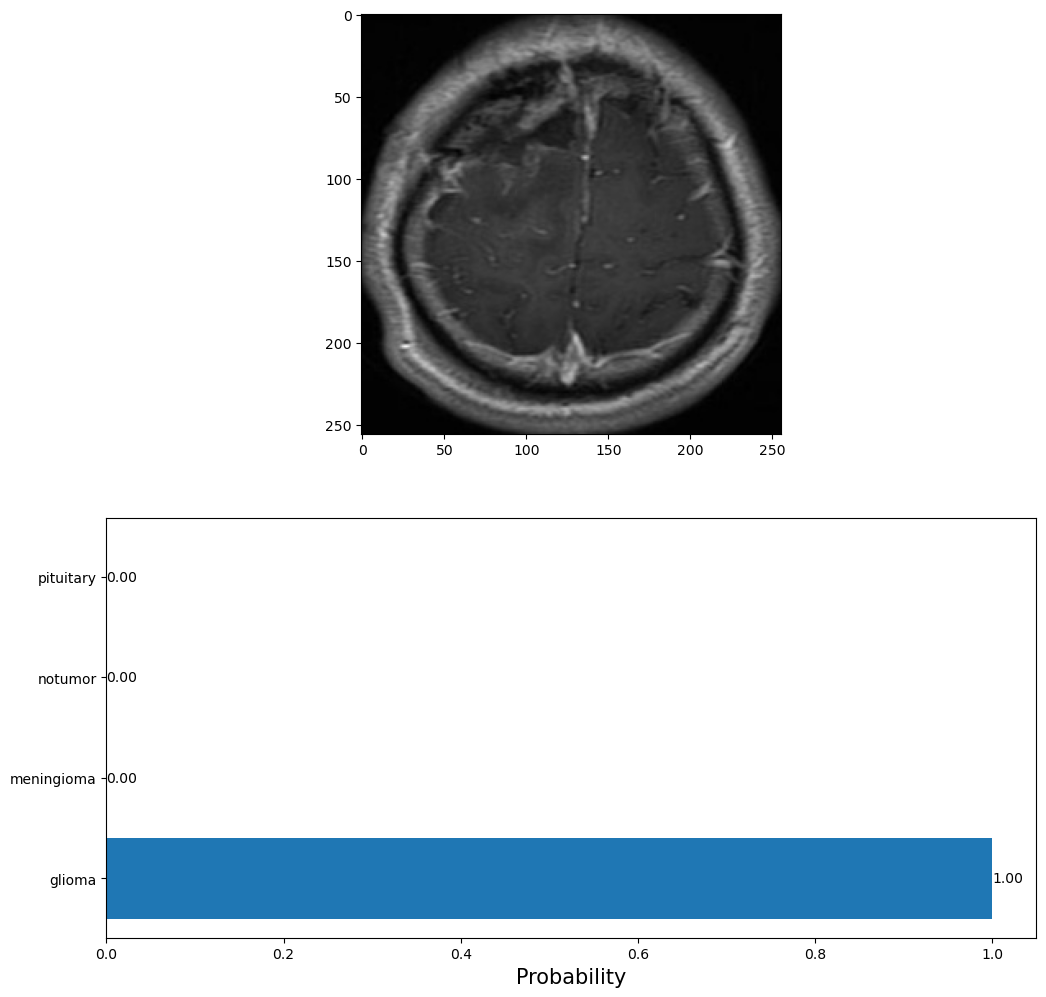

In [16]:
predict('cleaned/Testing/glioma/Te-gl_0017.jpg', classes, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


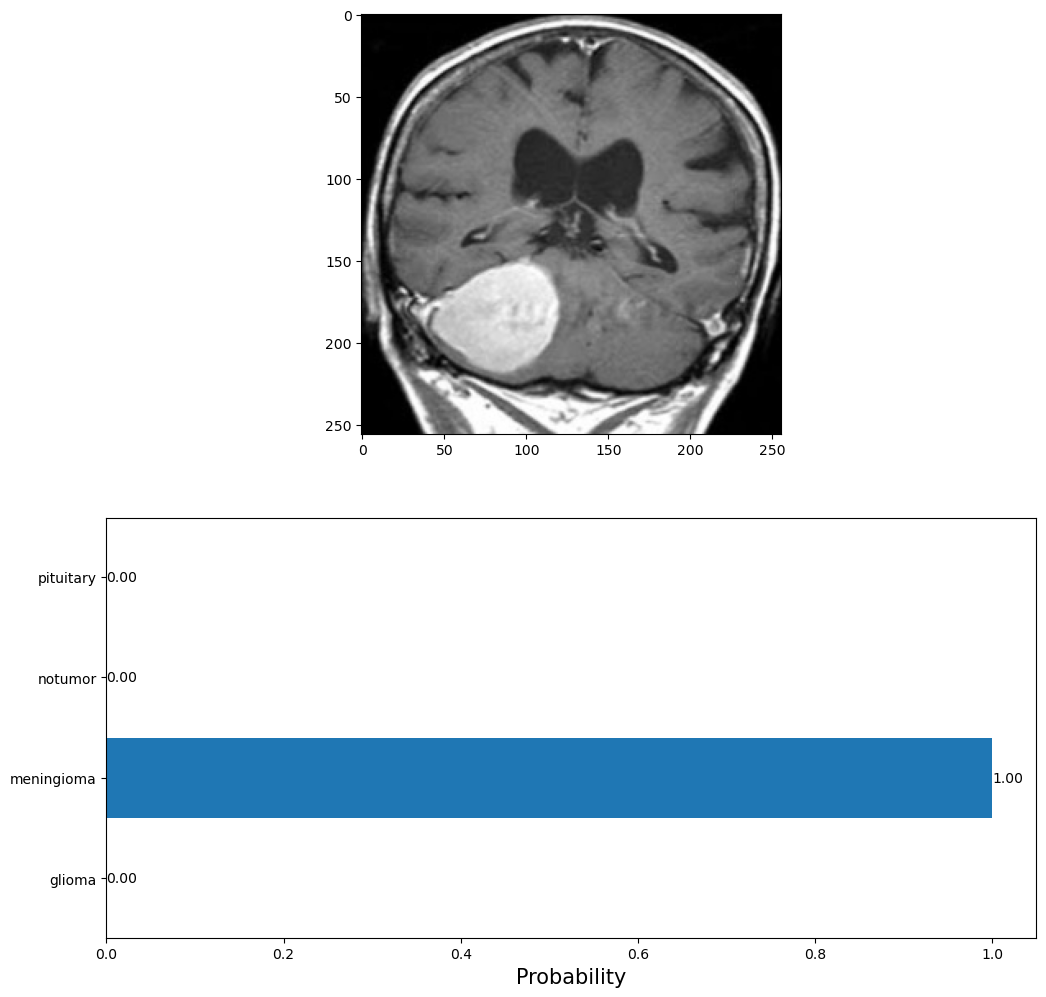

In [17]:
predict('cleaned/Testing/meningioma/Te-me_0020.jpg', classes, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


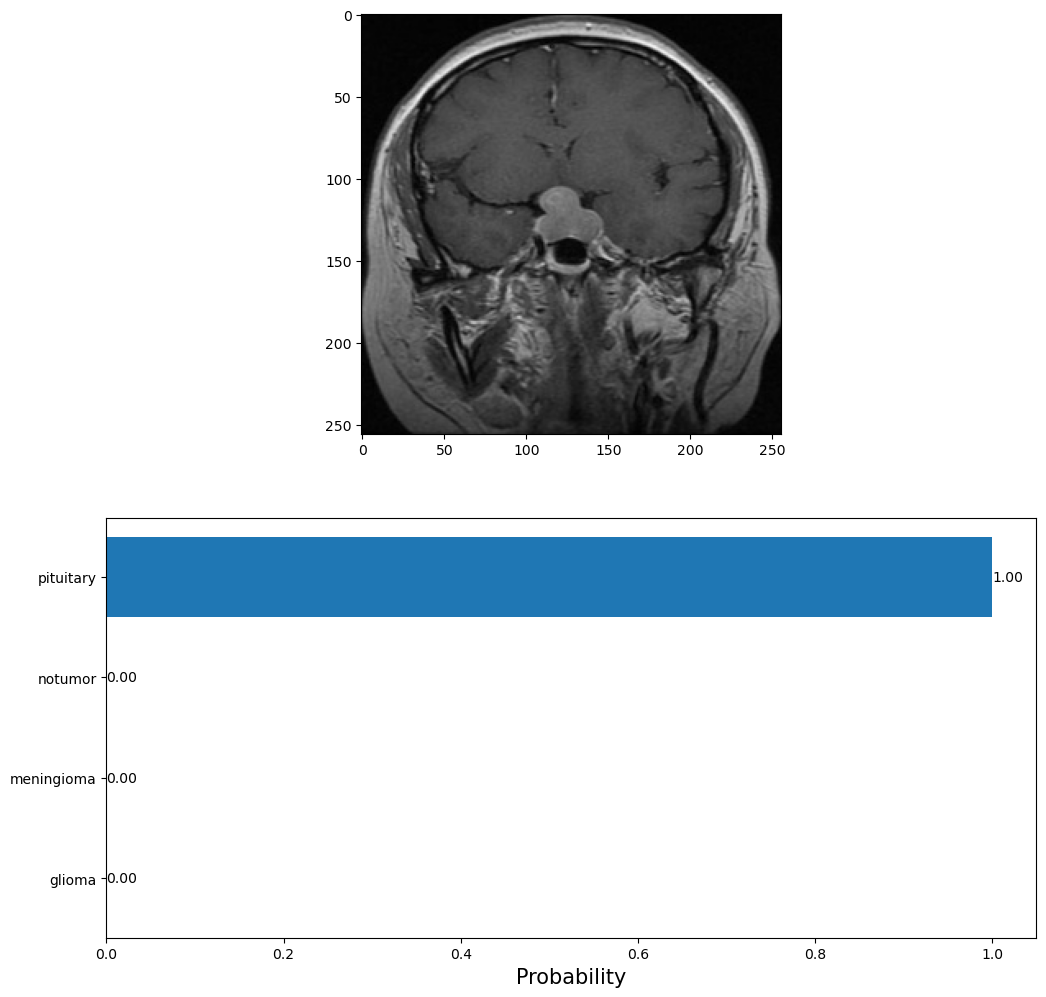

In [19]:
predict('cleaned/Testing/pituitary/Te-pi_0107.jpg', classes, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


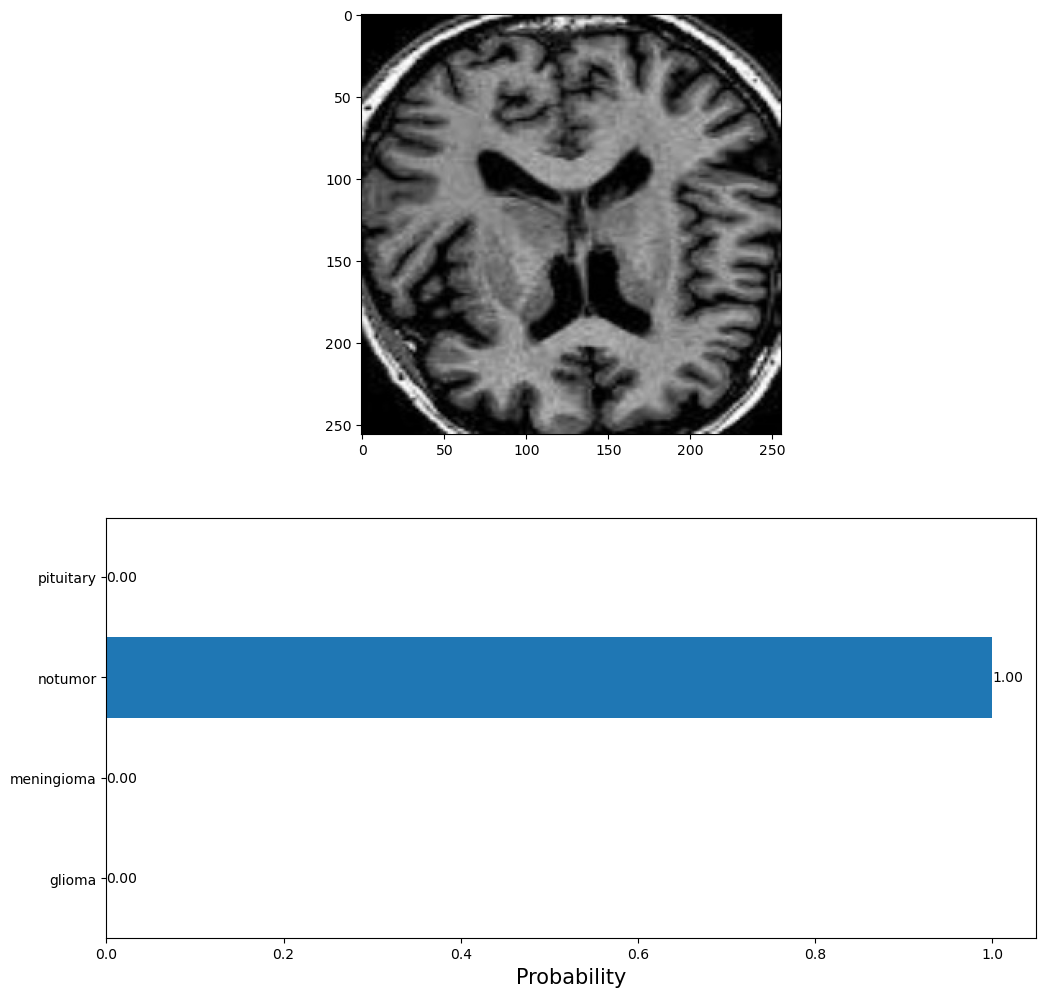

In [20]:
predict('cleaned/Testing/notumor/Te-no_0139.jpg', classes, model)